<a href="https://colab.research.google.com/github/devrathore1/Classification_model/blob/main/Classifications_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1 DBSCAN

In [ ]:
#Checking the data shape
df1.head()

#Scaling the data
df1_scaled = StandardScaler().fit_transform(df1)

In [ ]:
#Running DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(df1_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Check the number of clusters present in the label and ignoring the noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Get the total cluster & Silhoutte coefficient
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df1_scaled, labels))


# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

Estimated number of clusters: 5
Silhouette Coefficient: 0.805


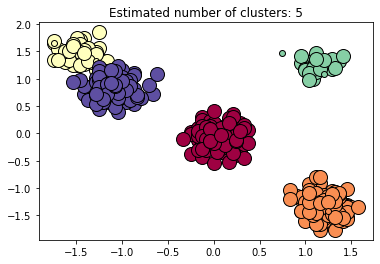

In [ ]:
# Plotting the available clusters and ignoring the nose.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df1_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df1_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


## 1.2: Clustering Algorithm #2: KNN:

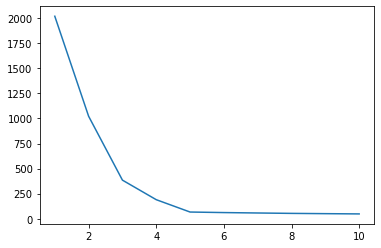

In [ ]:
#Scaling the data
df1 = StandardScaler().fit_transform(df1)

#turning scaled data into datafro m
df1= pd.DataFrame(StandardScaler().fit_transform(df1))

#determining the appropriate cluster size 

inertia_score = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df1)
  inertia_score.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_score)

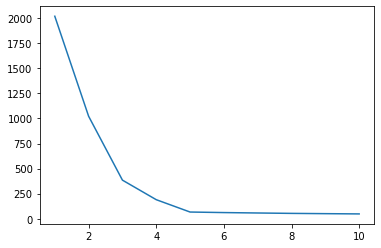

In [ ]:
plt.plot(range(1,11), inertia_score)



In [ ]:
#Checking clusters and creating a new feature in dataframe 
clustering = KMeans(n_clusters= 5)
clustering.fit(df1[[0,1,2,3]])
df1['cluster type'] = clustering.labels_
df1.head()

,0,1,2,3,cluster type
0,-0.042287,0.062733,1.103593,-1.072467,0
1,-0.000821,0.174811,1.102641,-1.303473,0
2,0.123577,-0.021200,0.761727,-0.526556,0
3,-0.000821,-0.031712,1.004705,-0.913395,0
4,1.160228,-1.606165,-0.602619,1.012686,1


In [ ]:
df2_persona = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")

In [ ]:
#Concatenate newly created cluster label with original dataset to identify the personas
df2_persona['cluster type'] = clustering.labels_
df2_persona.head()

,Age,Income,SpendingScore,Savings,cluster type
0,58,77769,0.791329,6559.829923,0
1,59,81799,0.791082,5417.661426,0
2,62,74751,0.702657,9258.992965,0
3,59,74373,0.765680,7346.334504,0
4,87,17760,0.348778,16869.507130,1


In [ ]:
#Checking the persona 's stats 
print('\n Persona 0:')
print(df2_persona.loc[df2_persona['cluster type'] == 0 ].mean())

print('\n Persona 1:')
print(df2_persona.loc[df2_persona['cluster type'] == 1 ].mean())

print('\n Persona 2:')
print(df2_persona.loc[df2_persona['cluster type'] == 2 ].mean())

print('\n Persona 3:')
print(df2_persona.loc[df2_persona['cluster type'] == 3 ].mean())

print('\n Persona 4:')
print(df2_persona.loc[df2_persona['cluster type'] == 4 ].mean())


 Persona 0:
Age                 59.955414
Income           72448.063694
SpendingScore        0.771518
Savings           6889.972190
cluster type         0.000000
dtype: float64

 Persona 1:
Age                 87.775510
Income           27866.102041
SpendingScore        0.328800
Savings          16659.261445
cluster type         1.000000
dtype: float64

 Persona 2:
Age                  32.777778
Income           105265.809524
SpendingScore         0.309926
Savings           14962.778066
cluster type          2.000000
dtype: float64

 Persona 3:
Age                  24.180000
Income           128029.120000
SpendingScore         0.896892
Savings            4087.520309
cluster type          3.000000
dtype: float64

 Persona 4:
Age                  86.000000
Income           119944.040000
SpendingScore         0.068378
Savings           14808.683793
cluster type          4.000000
dtype: float64


In [ ]:
#Persona 0 : 
#Mean Age =32.7, Income = $105265  Spending score: 0.30, Savings $16,659
#Young aged or Millenials with high disposable income but careful with money as spending score is low and consider savings.
#For ex: Recent MBA/MMA gradudates

#Persona 1 : 
#Mean Age = 59.95, Income = $72448  Spending score: 0.77, Savings $6889
# Aged people with average income and high spending score and low savings. 
#For ex: Newly retired professionals

#Persona 2 : 
#Mean Age = 87.75, Income = $27866  Spending score: 0.32, Savings $16659
#Old aged people with low  income and low spending score and considerable savings. 
#For ex: Retired old aged with social support assitance 

#Persona 3 : 
#Mean Age = 24.18, Income = $128029  Spending score: 0.8968, Savings $4087
#High income millenials with high disposable income with minimal savings
#For ex: New Wallstreet bankers

##Persona 4 : 
#Mean Age = 86.000000, Income = $119944.040000  Spending score: 0.068378, Savings $14808.683793
#Old aged with high income and extremly frugal with money. For ex: Long time investor, retired lawyers, doctors etc. 

In [ ]:
df1

,0,1,2,3,cluster type
0,-0.042287,0.062733,1.103593,-1.072467,0
1,-0.000821,0.174811,1.102641,-1.303473,0
2,0.123577,-0.021200,0.761727,-0.526556,0
3,-0.000821,-0.031712,1.004705,-0.913395,0
4,1.160228,-1.606165,-0.602619,1.012686,1
...,...,...,...,...,...
500,-1.286268,0.714535,-0.453557,0.621787,2
501,1.409024,-1.545704,-1.164109,1.235201,1
502,1.284626,-1.118447,-0.578054,0.855313,1
503,1.326092,-1.524929,-0.579866,1.322452,1


Clustering algorithm part 2: KNN with Snakeplots & RFM for all features 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

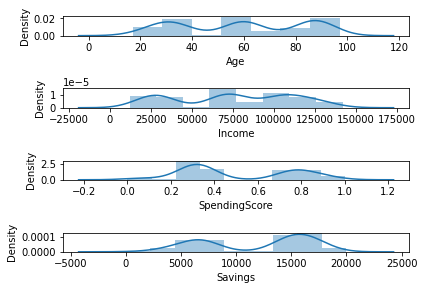

In [ ]:
#Save the required features
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")

df1 = df1[['Age', 'Income', 'SpendingScore', 'Savings']]

# Check data distribution of all features
plt.subplot(4, 1, 1); sns.distplot(df1['Age'])

plt.subplot(4, 1, 2); sns.distplot(df1['Income'])

plt.subplot(4, 1, 3); sns.distplot(df1['SpendingScore'])

plt.subplot(4, 1, 4); sns.distplot(df1['Savings'])

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Check is na 
df1.isna

<bound method DataFrame.isna of      Age  Income  SpendingScore       Savings
0     58   77769       0.791329   6559.829923
1     59   81799       0.791082   5417.661426
2     62   74751       0.702657   9258.992965
3     59   74373       0.765680   7346.334504
4     87   17760       0.348778  16869.507130
..   ...     ...            ...           ...
500   28  101206       0.387441  14936.775389
501   93   19934       0.203140  17969.693769
502   90   35297       0.355149  16091.401954
503   91   20681       0.354679  18401.088445
504   89   30267       0.289310  14386.351880

[505 rows x 4 columns]>

In [ ]:
#Use StandardScaler to fit the data

from sklearn.preprocessing import StandardScaler

# Unskew the data
df1_log = np.log(df1)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(df1)

# Scale and center the data
df1_normalized = scaler.transform(df1)

# Create a pandas DataFrame
df1_normalized = pd.DataFrame(data=df1_normalized, index=df1.index, 
                                   columns=df1.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

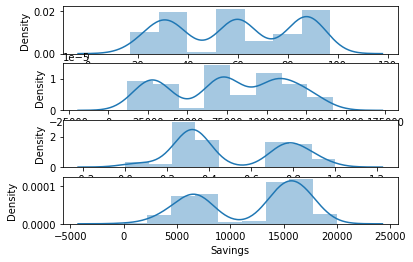

In [ ]:
plt.subplot(4, 1, 1); sns.distplot(df1['Age'])

plt.subplot(4, 1, 2); sns.distplot(df1['Income'])

plt.subplot(4, 1, 3); sns.distplot(df1['SpendingScore'])

plt.subplot(4, 1, 4); sns.distplot(df1['Savings'])

In [ ]:
# Importing  KMeans 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the processed data
kmeans.fit(df1_normalized)

#Get the required clusters 
cluster_labels = kmeans.labels_

In [ ]:
#Storing the cluster in the dataframe 
df1_new = df1.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = df1_new.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Age': 'mean',
    'Income': 'mean',
    'SpendingScore': ['mean'],
    'Savings': 'mean'
  }).round(1)

,Age,Income,SpendingScore,Savings
,mean,mean,mean,mean
Cluster,,,,
0,60.0,72448.1,0.8,6890.0
1,87.8,27866.1,0.3,16659.3
2,32.8,105265.8,0.3,14962.8
3,24.2,128029.1,0.9,4087.5
4,86.0,119944.0,0.1,14808.7


In [ ]:
#Sum of squared errors: Error between instance's square - mean square 
sse = dict()

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(df1_normalized)
    
    # Assign sum of squared distances to k
    sse[k] = kmeans.inertia_ 

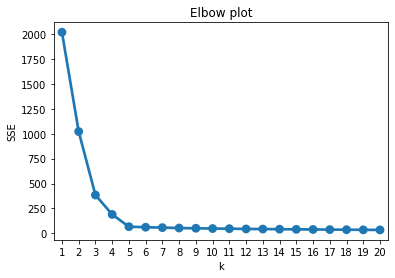

In [ ]:
# Add the plot title "Elbow plot"
plt.title('Elbow plot')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each element
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
#Based on the observation, required point would be between 4 and 5

For n_clusters = 2 The average silhouette_score is : 0.5212589967674504
For n_clusters = 3 The average silhouette_score is : 0.6963481945884472
For n_clusters = 4 The average silhouette_score is : 0.7581191889903789
For n_clusters = 5 The average silhouette_score is : 0.8048976287755765


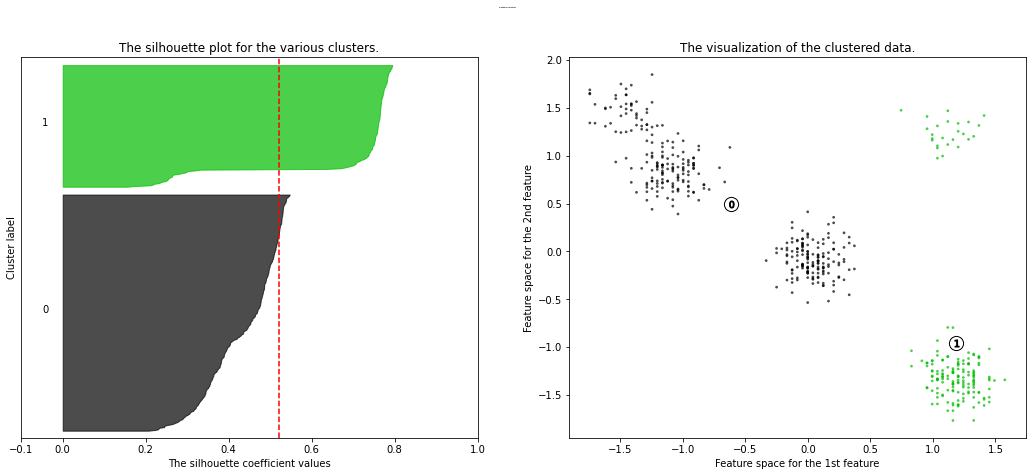

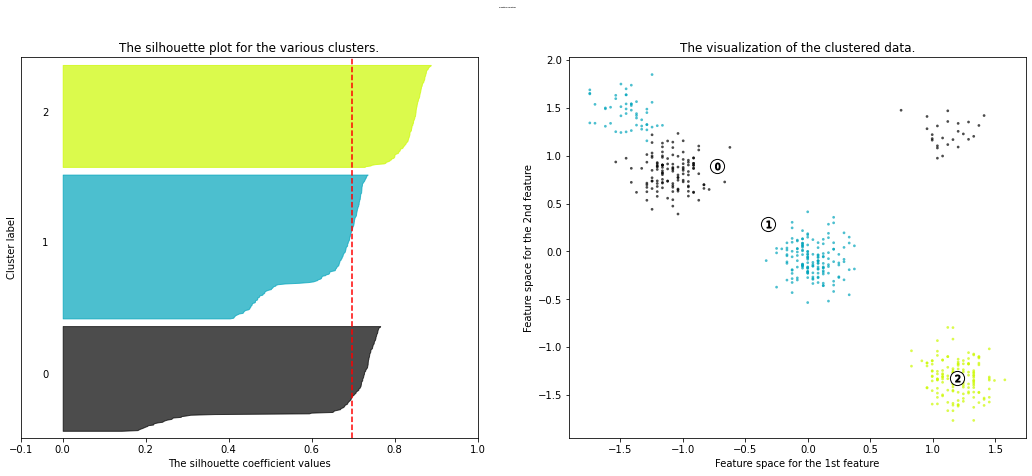

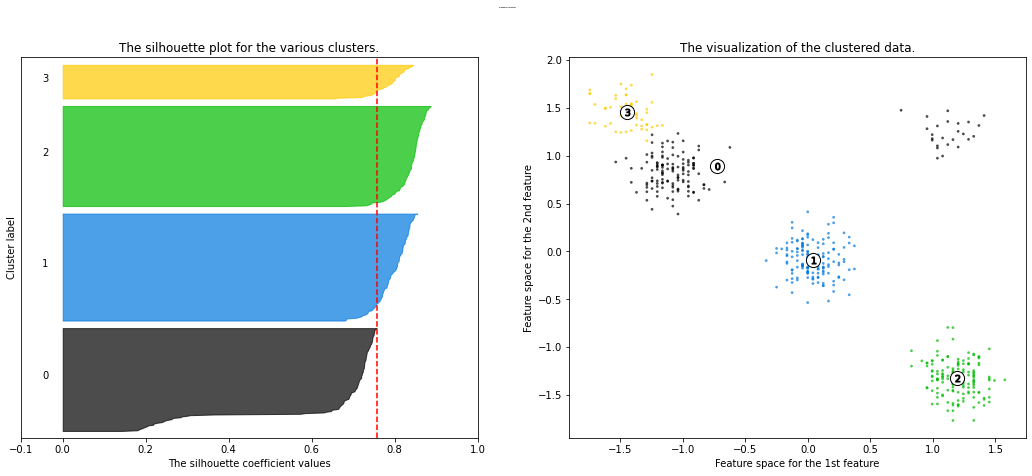

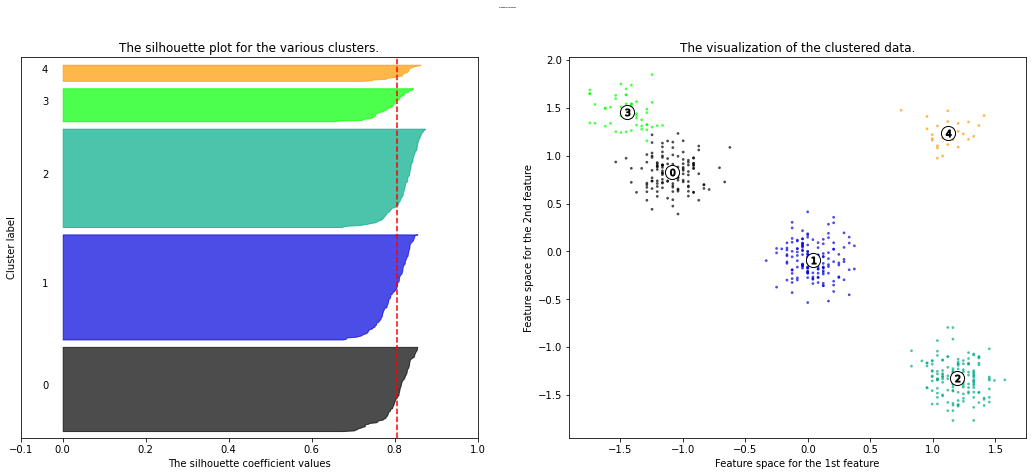

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = df1_normalized.values

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    
    #Demarcation
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value 
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # Average shilhouetter score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Demarcation of silhoutte level
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Actual cluser
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette score of clusters %d" % n_clusters),
                 fontsize=1, fontweight='bold')

plt.show()

In [ ]:
df1_normalized['Cluster'] = df1_new['Cluster']

# Melt the normalized dataset and reset the index
df1_melt = pd.melt(df1_normalized, 
                        
                    # Assign CustomerID and Cluster as ID variables                  
                    id_vars=['Cluster'],

                    # Assign RFM values as value variables
                    value_vars=['Age', 'Income', 'SpendingScore', 'Savings'], 
                        
                    # Name the variable and value
                    var_name='Metric', value_name='Value')

df1_melt.head()

,Cluster,Metric,Value
0,0,Age,-0.042287
1,0,Age,-0.000821
2,0,Age,0.123577
3,0,Age,-0.000821
4,1,Age,1.160228


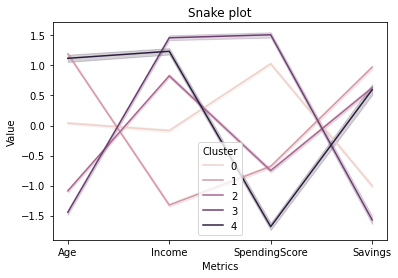

In [ ]:
# Add the plot title
plt.title('Snake plot')

# Add the x axis label
plt.xlabel('Metrics')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df1_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [ ]:
# Calculate average RFM values for each cluster
cluster_avg = df1_new.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df1.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
relative_imp.round(2)

,Age,Income,SpendingScore,Savings
Cluster,,,,
0,0.02,-0.04,0.53,-0.42
1,0.49,-0.63,-0.35,0.40
2,-0.44,0.39,-0.39,0.26
3,-0.59,0.70,0.78,-0.66
4,0.46,0.59,-0.86,0.25


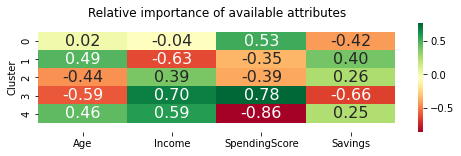

In [ ]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of available attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', annot_kws={"size": 16})
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

Clustering algorithm: 3 (Optional for review) AggClustering


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Import the dataset
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")

#Dataframe shape
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


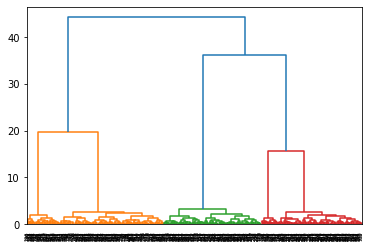

In [ ]:
#Scaling the dataframe
df1_scaled = StandardScaler().fit_transform(df1)

#Dendrogram creation
dendrogram = sch.dendrogram(sch.linkage(df1_scaled, method='ward'))

<function matplotlib.pyplot.scatter>

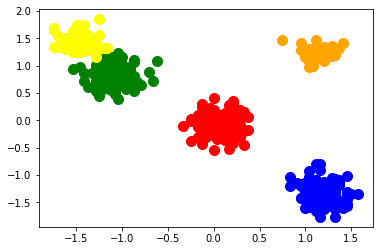

In [ ]:
#Using Aggloerative Clustering 

AggClustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

#Fit the data 
y_hc = AggClustering.fit_predict(df1_scaled)

#Plotting the clusters
from pandas.core.resample import f
plt.scatter(df1_scaled[y_hc == 0,0], df1_scaled[y_hc == 0,1], s= 100, c='blue')
plt.scatter(df1_scaled[y_hc == 1,0], df1_scaled[y_hc == 1,1], s= 100, c='red')
plt.scatter(df1_scaled[y_hc == 2,0], df1_scaled[y_hc == 2,1], s= 100, c='green')
plt.scatter(df1_scaled[y_hc == 3,0], df1_scaled[y_hc == 3,1], s= 100, c='yellow')
plt.scatter(df1_scaled[y_hc == 4,0], df1_scaled[y_hc == 4,1], s= 100, c='Orange')

plt.scatter

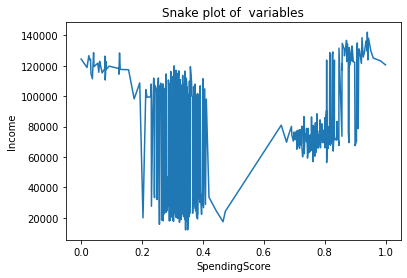

In [ ]:
#Attempt to create snakeplot 
import seaborn as sns
# Add the plot title
plt.title('Snake plot of  variables')

# Add the x axis label
plt.xlabel('SpendingScore')

# Add the y axis label
plt.ylabel('Income')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df1, x='SpendingScore', y='Income')
plt.show()

## 1.3 Model Comparison

For model's performance, we will use silhoutte score for comparison. 

Model 1: DBSCAN
Model 2: KMeans
Model 3: AgglomerateClustering 

Silhoutte score is comparable for DBSCAN (0.805) & KMeans (~0.82) 
Since Eucledian distance is used Kmeans is preffered. 

In terms of ease of use, all the models are comparable, however, KMeans can be used to deep dive further and it can provide better customer segementation knowledge. 

Kmeans is easy to implement and is intutive to understand. If the dataset was 100 or 1000 times bigger, Kmeans would be easy scale. 

Based on better score, ease of scaling and more intutitiveness, KMeans would be preffered


## 1.4 Personas

In [ ]:
#Display the cluster information
grouped.agg({
    'Age': 'mean',
    'Income': 'mean',
    'SpendingScore': ['mean'],
    'Savings': 'mean'
  }).round(2)

,Age,Income,SpendingScore,Savings
,mean,mean,mean,mean
Cluster,,,,
0,59.96,72448.06,0.77,6889.97
1,87.78,27866.10,0.33,16659.26
2,32.78,105265.81,0.31,14962.78
3,24.18,128029.12,0.90,4087.52
4,86.00,119944.04,0.07,14808.68


In [ ]:

#Persona 0 : 
#Mean Age = 59.95, Income = $72448  Spending score: 0.77, Savings $6889
# Aged people with average income and high spending score and low savings. 
#For ex: Newly retired professionals

#Persona 1 : 
#Mean Age = 87.75, Income = $27866  Spending score: 0.32, Savings $16659
#Old aged people with low  income and low spending score and considerable savings. 
#For ex: Retired old aged with social support assitance 

#Persona 2 : 
#Mean Age =32.7, Income = $105265  Spending score: 0.30, Savings $16,659
#Young aged or Millenials with high disposable income but careful with money as spending score is low and highest savings.
#For ex: Recent MBA/MMA gradudates with good finacial understanding


#Persona 3 : 
#Mean Age = 24.18, Income = $128029  Spending score: 0.8968, Savings $4087
#High income millenials with high disposable income with minimal savings
#For ex: New Wallstreet bankers

##Persona 4 : 
#Mean Age = 86.000000, Income = $119944.040000  Spending score: 0.068378, Savings $14808.683793
#Old aged with high income and extremly frugal with money. For ex: Long time investor, retired lawyers, doctors etc. 